# Predicting Sales Prices

 ## Dataset Attributes

 The dataset contains information about houses in Ames, Iowa. The data was collected by the Ames City Assessor’s Office describing 2930 property sales which occurred in Ames, Iowa between 2006 and 2010. The dataset, containing 81 variables, was compiled and published by De Cock in 2011.

 Some of the variables contained in the original dataset have been removed from the the dataset provided to you.
 The dataset provided to you contains the following variables:
* **Year_Built:** year that the house was originally constructed
* **Year_Remod_Add:** year that the house was last remodelled
* **Total_Bsmt_SF:** total size of basement area in square feet
* **First_Flr_SF:** size of the first floor in square feet
* **Second_Flr_SF:** size of the second floor in square feet
* **Gr_Liv_Area:** size of above grade, ground living area in square feet
* **Full_Bath:** number of full above grade bathrooms in the house
* **Half_Bath:** number of half above grade bathrooms in the house
* **Bedroom_AbvGr:** number of above grade bedrooms (does not include basement bedrooms)
* **Kitchen_AbvGr:** number of above grade kitchens
* **TotRms_AbvGrd:** total number of above grade rooms (does not include bathrooms)
* **Fireplaces:** number of fireplaces in the house
* **Garage_Area:** size of garage in square feet
* **Sale_Price:** sale price of the house in dollars


*De Cock, D. (2011). "Ames, Iowa: Alternative to the Boston Housing Data as an End of Semester
Regression Project," Journal of Statistics Education, Volume 19, Number 3.*

- https://ww2.amstat.org/publications/jse/v19n3/decock/DataDocumentation.txt
- http://ww2.amstat.org/publications/jse/v19n3/decock.pdf


 ## Objective

 The goal of this task is to analyse the relationship between these variables and build a multiple linear regression model to predict the sales prices based on the 'Gr_Liv_Area' and 'Garage_Area` variables.


In [115]:
# Import libraries
import pandas as pd
import numpy as np
from mlxtend.preprocessing import minmax_scaling, standardize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt


In [116]:
# Read in the data set
df = pd.read_csv('ames.csv')
df.head()


,Year_Built,Year_Remod_Add,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Gr_Liv_Area,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,TotRms_AbvGrd,Fireplaces,Garage_Area,Sale_Price
0,1960,1960,1080,1656,0,1656,1,0,3,1,7,2,528,215000
1,1961,1961,882,896,0,896,1,0,2,1,5,0,730,105000
2,1958,1958,1329,1329,0,1329,1,1,3,1,6,0,312,172000
3,1968,1968,2110,2110,0,2110,2,1,3,1,8,2,522,244000
4,1997,1998,928,928,701,1629,2,1,3,1,6,1,482,189900


In [117]:
# Clean and pre-process the data if neccessary
df.shape

# Get the number of missing data values per column
df.isnull().sum()

Year_Built        0
Year_Remod_Add    0
Total_Bsmt_SF     0
First_Flr_SF      0
Second_Flr_SF     0
Gr_Liv_Area       0
Full_Bath         0
Half_Bath         0
Bedroom_AbvGr     0
Kitchen_AbvGr     0
TotRms_AbvGrd     0
Fireplaces        0
Garage_Area       0
Sale_Price        0
dtype: int64

There are no missing values, so no data cleaning is necessary

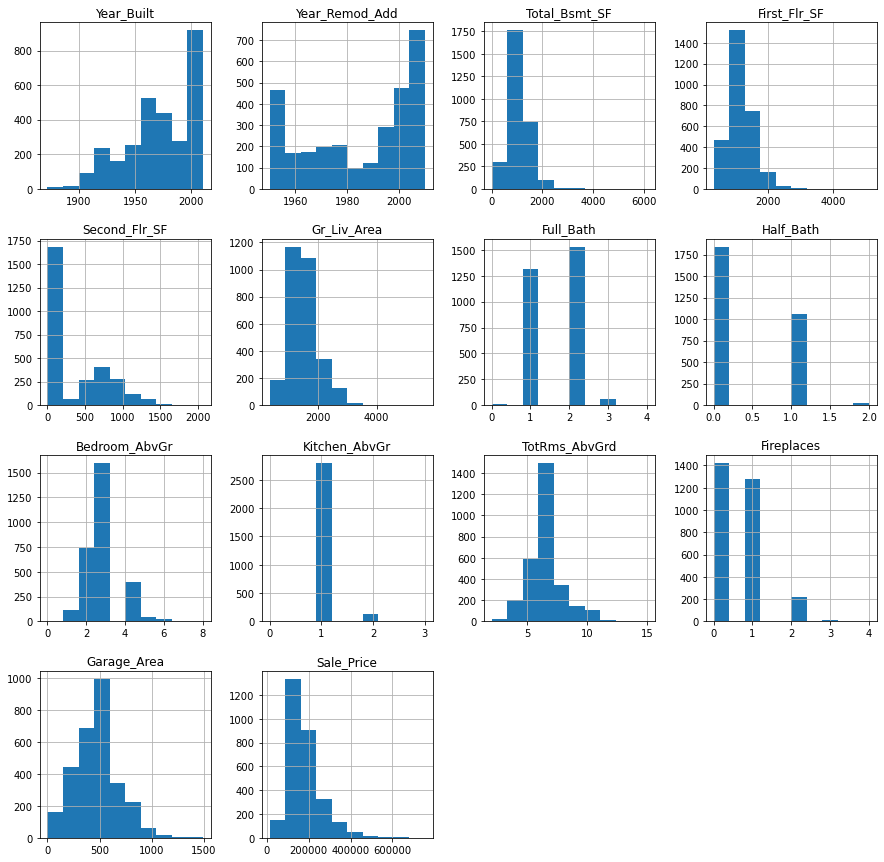

<AxesSubplot:>

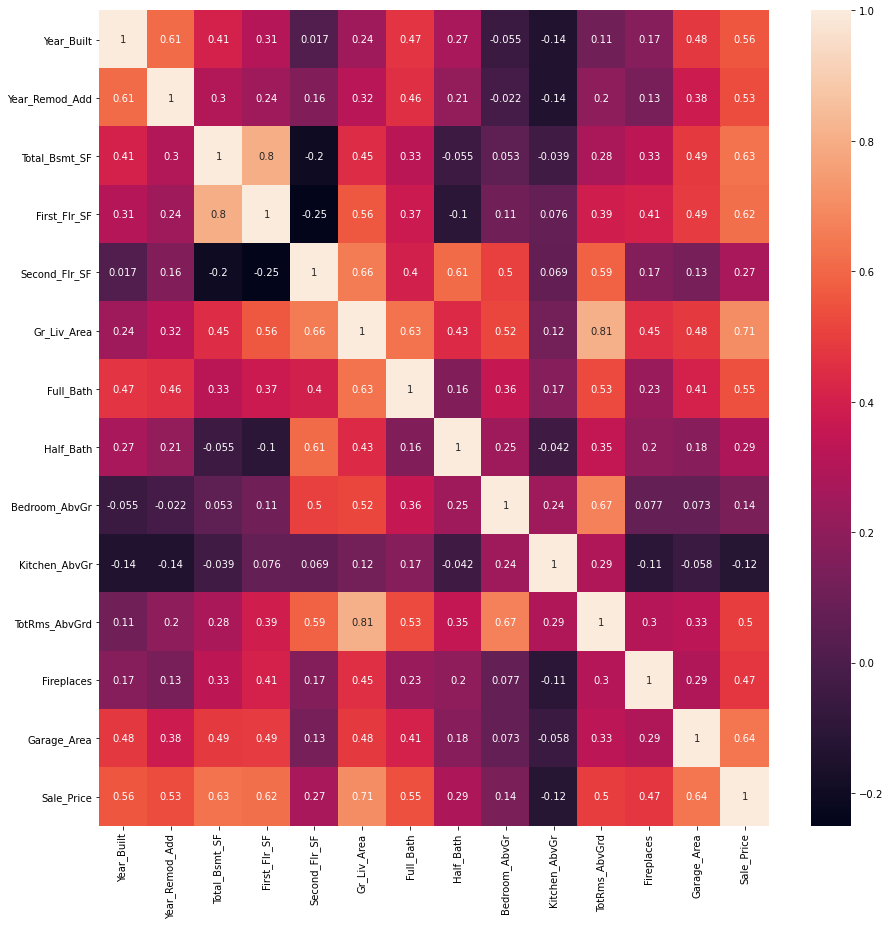

In [97]:
# Explore the data with visualisations such as histograms and correlation matrices

# Plot histograms of each of the features
df.hist(figsize=(15, 15))
plt.show()

# Create correlation matrix of the features
cor = df.corr()
plt.figure(figsize= (15,15))
sns.heatmap(cor, annot = True)

From the above graphs, we can see that the feature Kitchen_AbvGr has very little variance, so has very little correlation with any of the other features. This means this can be dropped from our analysis. Similarly, Half_Bath is weakly correlated with the other features, so will have little impact in our analysis, so can also be dropped.
The strongest correlations are between TotRms_AbvGrd & Gr_Liv_Area (0.81), and between Total_Bsmt_SF & First_FLr_SF. This means we can drop one of each of these, as they are very well predicted by the other. We should drop TotRms_AbvGrd and First_Flr_SF, as these are the ones with the weaker correlation with Sale_Price, our dependent variable.

In [118]:
df = df.drop(['Kitchen_AbvGr', 'Half_Bath', 'TotRms_AbvGrd', 'First_Flr_SF'], axis=1)
df.head()

,Year_Built,Year_Remod_Add,Total_Bsmt_SF,Second_Flr_SF,Gr_Liv_Area,Full_Bath,Bedroom_AbvGr,Fireplaces,Garage_Area,Sale_Price
0,1960,1960,1080,0,1656,1,3,2,528,215000
1,1961,1961,882,0,896,1,2,0,730,105000
2,1958,1958,1329,0,1329,1,3,0,312,172000
3,1968,1968,2110,0,2110,2,3,2,522,244000
4,1997,1998,928,701,1629,2,3,1,482,189900


In [119]:
# Split the independent variables from the dependent variable

# The independent variables are Gr_Liv_Area and Garage_Area
# The dependent variable is Sale_Price
X = df[['Gr_Liv_Area', 'Garage_Area']].values
X = X.reshape(-1, X.shape[1])
Y = df[['Sale_Price']].values
Y = Y.reshape(-1,1)

<AxesSubplot:>

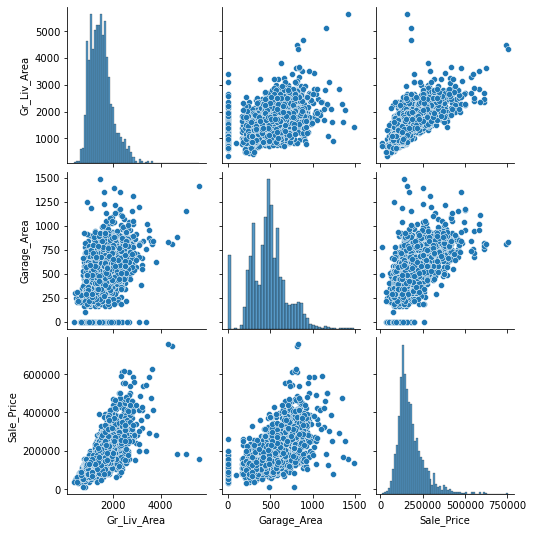

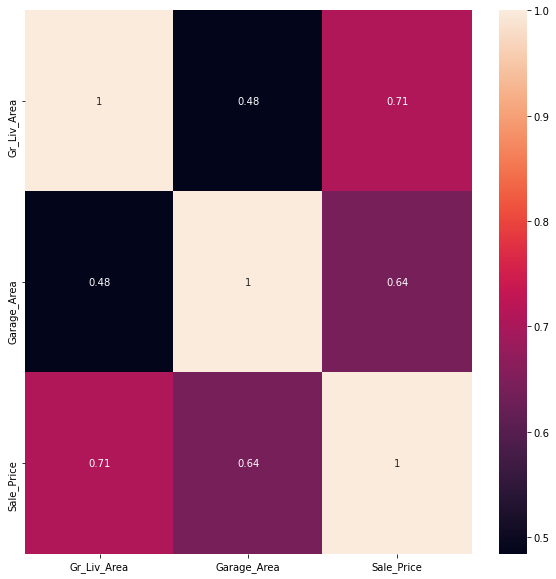

In [120]:
# Explore relationships between the independent and dependent variables

# Create new dataframe only with the independent and dependent variables
data = df[['Gr_Liv_Area', 'Garage_Area', 'Sale_Price']]

# Plot scatterplots and histograms of the restricted dataframe
sns.pairplot(data=data)

# Plot restricted correlation matrix
cor = data.corr()
plt.figure(figsize= (10,10))
sns.heatmap(cor, annot = True)

From the above graphs, we can see that there is a reasonably strong positive correlation between both Gr_Liv_Area and Garage_Area with Sale_Price. This correlation is strongest with Gr_Liv_Area

In [121]:
# Create a training and test set with a 75:25 split ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, shuffle=True)

In [123]:
# Build a multiple linear regression model using 'Gr_Liv_Area' and 'Garage_Area'

# First, we should normalise the data for 'Gr_Liv_Area' and 'Garage_Area' as they are on very different scales, 
# but aren't normally distributed so shouldn't be standardised

scaler = MinMaxScaler()
# Fit the scaler to the training data
scaler.fit(X_train)
# Apply the scaler on train and test data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


# Fit a model
lm = LinearRegression()
model = lm.fit(X_train, Y_train)


In [124]:
# Print the model intercept and coefficients
intercept = model.intercept_
coefficients = model.coef_[0]

# create dataframe of coefficients for readability
coefficients_df = pd.DataFrame({
    'Feature': ['Gr_Liv_Area', 'Garage_Area'],
    'Coefficient': coefficients
})

print('Intercept = ', intercept)
print(coefficients_df)

Intercept =  [18363.45614157]
       Feature    Coefficient
0  Gr_Liv_Area  423984.846815
1  Garage_Area  208386.268866


In [125]:
# Generate predictions for the test set
predictions = model.predict(X_test)
print(predictions[:10])

[[229491.08810835]
 [212288.55410039]
 [170825.55062525]
 [153508.98546846]
 [ 90216.81670348]
 [120314.75972751]
 [165815.33512988]
 [198362.1874135 ]
 [266136.65754178]
 [211942.60484728]]


In [126]:
# Evaluate the model
mse = mean_squared_error(Y_test, predictions)
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

# R squared score
print ("R2 Score:", round (model.score(X_test, Y_test), 4))


Mean Squared Error (MSE): 2522749667.2574234
Root Mean Squared Error (RMSE): 50226.98146671193
R2 Score: 0.6392


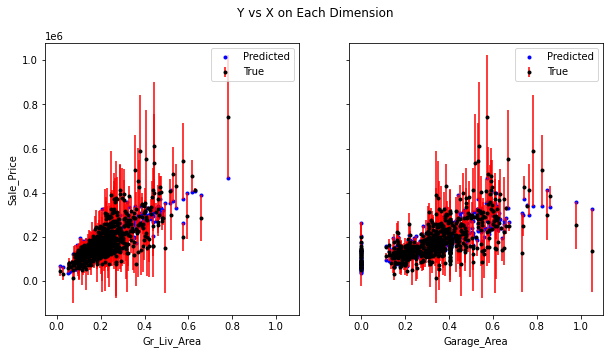

In [127]:
# Generate a plot

# Plot the errors
fig, ax = plt.subplots(1, X_test.shape[1], sharey=True, sharex=True, figsize=(10,5))
fig.suptitle("Y vs X on Each Dimension")
ax[0].set_ylabel(data.columns[2])

# Get values for the error bar
error_bar_values = np.abs((Y_test - predictions)[:,0])

# Plot data, predicted values, and error bars
for i in range(X_test.shape[1]):
    ax[i].errorbar(X_test[:, i], Y_test[:, 0], yerr=error_bar_values, fmt='.k', ecolor='red', label='True')
    ax[i].scatter(X_test[:,i], predictions[:,0], c='b', marker='.', label='Predicted')
    ax[i].set_xlabel(data.columns[i])
    ax[i].legend(loc='best')

In [130]:
# Print the coefficients
print('Intercept = ', intercept)
print(coefficients_df)

Intercept =  [18363.45614157]
       Feature    Coefficient
0  Gr_Liv_Area  423984.846815
1  Garage_Area  208386.268866


**Interpret coefficients in the context of the prediction:**

Both of the coefficients are positive and large, which indicates that the house price increases greatly as both Gr_Liv_Area and Garage_Area increase. The coefficient for Gr_Liv_Area however, is about twice as large as that for Garage_Area, which indicates that an increase in Gr_Liv_Area has about twice the impact on the house value compared with a porportional increase in Garage_Area.

**Summarise findings**

The goal of this analysis was to build a multiple linear regression model which predicts house prices (dependant variable) based on the Gr_Liv and Garage_Area variables (independant variables). Exploratory data analysis suggested that there was a reasonable positive correlation between these two variables and the house price. We normalised the independant variables so that they had the same scales before applying the model.

The regression equation was approximately

Price = 450000 * Normalised_Gr_Liv_Area + 200000 * Normalised_Garage_Area + 20000

The R-squared value of the model was 0.6392, meaning that about 64% of the variance in the house prices was explained by the model. The RMSE was 50000, which indicates the average prediction error was $50,000, which is significant. This suggests that a linear regression model is perhaps not sophisticated enough to accurately model this data, and a more complex model could perform better. It could also suggest there are significant outliers in the data, or that Gr_Liv_Area and Garage_Area are not the best variables to use when looking to predict house prices.